In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
from activ import load_data
from activ.readfile import load_preprocessed, TrackTBIFile, encode
from activ.data_normalization import data_normalization
import pandas as pd
from sklearn import preprocessing
from collections import Counter
import h5py
from sklearn.decomposition import PCA

In [3]:
def conf_alliter(size, predicted, actual):
    confalliter = []
    for j in range(50):
        conf = np.zeros((size,size))
        labs = list(map(int, actual[j][size-2]))
        preds = list(map(int, predicted[j][size-2]))
        for l, p in zip(labs, preds):
            conf[l,p] += 1
        confalliter.append(conf)
    return confalliter

def accuracy(mat):
    return mat.trace()/mat.sum()

/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


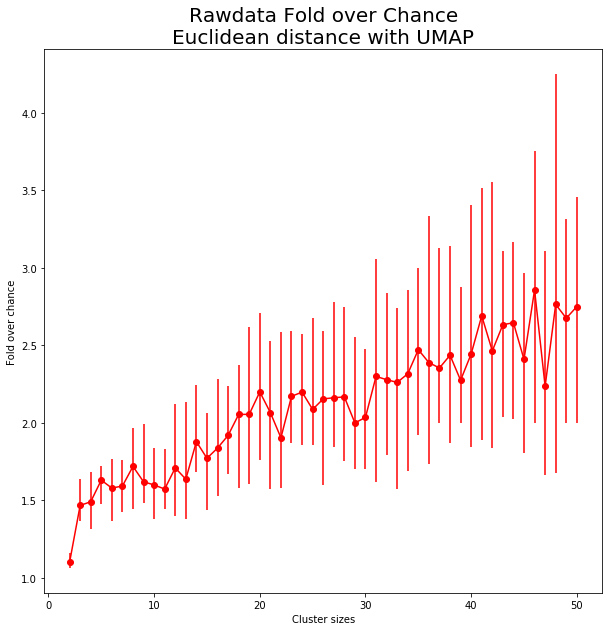

In [3]:
path = '/Users/ahyeon/Desktop/activ misc/rawdata_shuffled_euc_results.h5'
f = h5py.File(path, 'r')
predictions = np.squeeze(f['score'][:], axis=1)
norm_predictions = np.squeeze(f['norm_score'][:], axis=1)
cluster_sizes = f['cluster_sizes'][:]
labels = np.squeeze(f['clusters'][:], axis=1)
fold_over_chance = np.zeros((len(cluster_sizes), 50))
raw_acc = np.zeros((len(cluster_sizes), 50))
normalized_acc = np.zeros((len(cluster_sizes), 50))
for jj,c in enumerate(cluster_sizes):
    all50mat = conf_alliter(c, predictions, labels)
    norm_all50mat = conf_alliter(c, norm_predictions, labels)
    acc = [accuracy(i) for i in all50mat]
    norm_acc = [accuracy(i) for i in norm_all50mat]
    foc = [float(x/y) for x, y in zip(acc, norm_acc)]
    fold_over_chance[jj,:] = foc
    raw_acc[jj,:] = acc
    normalized_acc[jj,:] = norm_acc


plt.rcParams["figure.figsize"] = [10,10]
cmap = plt.get_cmap("tab10")
lower = np.asarray([np.percentile(fold_over_chance[i,:], 25) for i in range(49)])
upper = np.asarray([np.percentile(fold_over_chance[i,:], 75) for i in range(49)])
med = np.median(fold_over_chance, axis=1)
raw_med = np.median(raw_acc, axis=1)
raw_lower = [np.percentile(raw_acc[i,:], 25) for i in range(49)]
raw_upper = [np.percentile(raw_acc[i,:], 75) for i in range(49)]
norm_med = np.median(normalized_acc, axis=1)
norm_lower = [np.percentile(normalized_acc[i,:], 25) for i in range(49)]
norm_upper = [np.percentile(normalized_acc[i,:], 75) for i in range(49)]
yerr = upper-lower
rel_iqr = yerr/med

plt.errorbar(cluster_sizes, med, yerr=[med-lower,upper-med], color = 'red',fmt='-o', label='Fold over chance')


plt.title("Rawdata Fold over Chance\nEuclidean distance with UMAP", fontsize=20)
plt.xlabel("Cluster sizes")
plt.ylabel("Fold over chance")

plt.savefig('/Users/ahyeon/Desktop/activ misc/rawdata_shuffled_euc_foc.pdf')

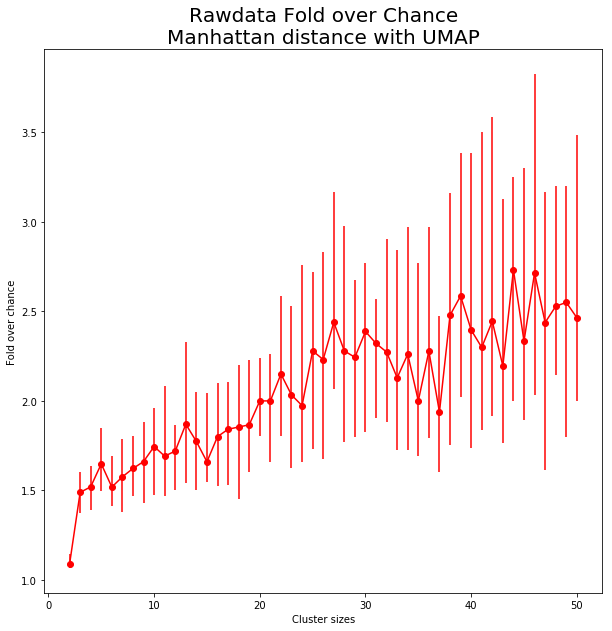

In [4]:
path = '/Users/ahyeon/Desktop/activ misc/rawdata_shuffled_manhattan_results.h5'
f = h5py.File(path, 'r')
predictions = np.squeeze(f['score'][:], axis=1)
norm_predictions = np.squeeze(f['norm_score'][:], axis=1)
cluster_sizes = f['cluster_sizes'][:]
labels = np.squeeze(f['clusters'][:], axis=1)
fold_over_chance = np.zeros((len(cluster_sizes), 50))
raw_acc = np.zeros((len(cluster_sizes), 50))
normalized_acc = np.zeros((len(cluster_sizes), 50))
for jj,c in enumerate(cluster_sizes):
    all50mat = conf_alliter(c, predictions, labels)
    norm_all50mat = conf_alliter(c, norm_predictions, labels)
    acc = [accuracy(i) for i in all50mat]
    norm_acc = [accuracy(i) for i in norm_all50mat]
    foc = [float(x/y) for x, y in zip(acc, norm_acc)]
    fold_over_chance[jj,:] = foc
    raw_acc[jj,:] = acc
    normalized_acc[jj,:] = norm_acc


plt.rcParams["figure.figsize"] = [10,10]
cmap = plt.get_cmap("tab10")
lower = np.asarray([np.percentile(fold_over_chance[i,:], 25) for i in range(49)])
upper = np.asarray([np.percentile(fold_over_chance[i,:], 75) for i in range(49)])
med = np.median(fold_over_chance, axis=1)
raw_med = np.median(raw_acc, axis=1)
raw_lower = [np.percentile(raw_acc[i,:], 25) for i in range(49)]
raw_upper = [np.percentile(raw_acc[i,:], 75) for i in range(49)]
norm_med = np.median(normalized_acc, axis=1)
norm_lower = [np.percentile(normalized_acc[i,:], 25) for i in range(49)]
norm_upper = [np.percentile(normalized_acc[i,:], 75) for i in range(49)]
yerr = upper-lower
rel_iqr = yerr/med

plt.errorbar(cluster_sizes, med, yerr=[med-lower,upper-med], color = 'red',fmt='-o', label='Fold over chance')


plt.title("Rawdata Fold over Chance\nManhattan distance with UMAP", fontsize=20)
plt.xlabel("Cluster sizes")
plt.ylabel("Fold over chance")

plt.savefig('/Users/ahyeon/Desktop/activ misc/rawdata_shuffled_manhattan_foc.pdf')

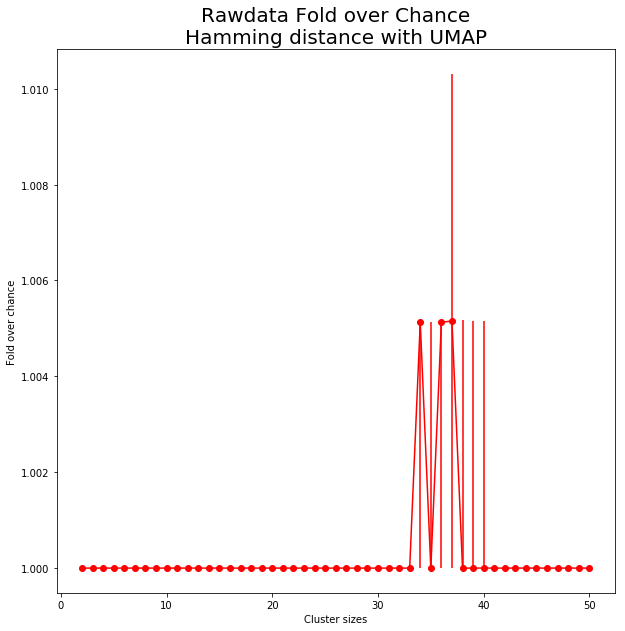

In [4]:
path = '/Users/ahyeon/Desktop/activ misc/rawdata_shuffled_hamming_results.h5'
f = h5py.File(path, 'r')
predictions = np.squeeze(f['score'][:], axis=1)
norm_predictions = np.squeeze(f['norm_score'][:], axis=1)
cluster_sizes = f['cluster_sizes'][:]
labels = np.squeeze(f['clusters'][:], axis=1)
fold_over_chance = np.zeros((len(cluster_sizes), 50))
raw_acc = np.zeros((len(cluster_sizes), 50))
normalized_acc = np.zeros((len(cluster_sizes), 50))
for jj,c in enumerate(cluster_sizes):
    all50mat = conf_alliter(c, predictions, labels)
    norm_all50mat = conf_alliter(c, norm_predictions, labels)
    acc = [accuracy(i) for i in all50mat]
    norm_acc = [accuracy(i) for i in norm_all50mat]
    foc = [float(x/y) for x, y in zip(acc, norm_acc)]
    fold_over_chance[jj,:] = foc
    raw_acc[jj,:] = acc
    normalized_acc[jj,:] = norm_acc


plt.rcParams["figure.figsize"] = [10,10]
cmap = plt.get_cmap("tab10")
lower = np.asarray([np.percentile(fold_over_chance[i,:], 25) for i in range(49)])
upper = np.asarray([np.percentile(fold_over_chance[i,:], 75) for i in range(49)])
med = np.median(fold_over_chance, axis=1)
raw_med = np.median(raw_acc, axis=1)
raw_lower = [np.percentile(raw_acc[i,:], 25) for i in range(49)]
raw_upper = [np.percentile(raw_acc[i,:], 75) for i in range(49)]
norm_med = np.median(normalized_acc, axis=1)
norm_lower = [np.percentile(normalized_acc[i,:], 25) for i in range(49)]
norm_upper = [np.percentile(normalized_acc[i,:], 75) for i in range(49)]
yerr = upper-lower
rel_iqr = yerr/med

plt.errorbar(cluster_sizes, med, yerr=[med-lower,upper-med], color = 'red',fmt='-o', label='Fold over chance')


plt.title("Rawdata Fold over Chance\nHamming distance with UMAP", fontsize=20)
plt.xlabel("Cluster sizes")
plt.ylabel("Fold over chance")

plt.savefig('/Users/ahyeon/Desktop/activ misc/rawdata_shuffled_hamming_foc.pdf')

In [24]:
def plot_clustering_results(file, save_name, plot_this):
    f = h5py.File(file, 'r')
    predictions = np.squeeze(f['score'][:], axis=1)
    norm_predictions = np.squeeze(f['norm_score'][:], axis=1)
    cluster_sizes = f['cluster_sizes'][:]
    labels = np.squeeze(f['clusters'][:], axis=1)
    fold_over_chance = np.zeros((len(cluster_sizes), 50))
    raw_acc = np.zeros((len(cluster_sizes), 50))
    normalized_acc = np.zeros((len(cluster_sizes), 50))
    for jj,c in enumerate(cluster_sizes):
        all50mat = conf_alliter(c, predictions, labels)
        norm_all50mat = conf_alliter(c, norm_predictions, labels)
        acc = [accuracy(i) for i in all50mat]
        norm_acc = [accuracy(i) for i in norm_all50mat]
        foc = [float(x/y) for x, y in zip(acc, norm_acc)]
        fold_over_chance[jj,:] = foc
        raw_acc[jj,:] = acc
        normalized_acc[jj,:] = norm_acc

    plt.rcParams["figure.figsize"] = [10,10]
    cmap = plt.get_cmap("tab10")
    lower = np.asarray([np.percentile(fold_over_chance[i,:], 25) for i in range(49)])
    upper = np.asarray([np.percentile(fold_over_chance[i,:], 75) for i in range(49)])
    med = np.median(fold_over_chance, axis=1)
    raw_med = np.median(raw_acc, axis=1)
    raw_lower = [np.percentile(raw_acc[i,:], 25) for i in range(49)]
    raw_upper = [np.percentile(raw_acc[i,:], 75) for i in range(49)]
    norm_med = np.median(normalized_acc, axis=1)
    norm_lower = [np.percentile(normalized_acc[i,:], 25) for i in range(49)]
    norm_upper = [np.percentile(normalized_acc[i,:], 75) for i in range(49)]
    yerr = upper-lower
    rel_iqr = yerr/med
    
    if plot_this == 'foc':
        plt.errorbar(cluster_sizes, med, yerr=[med-lower,upper-med], color = 'red',fmt='-o', label='Fold over chance')
        plt.title("Fold over Chance vs Cluster sizes", fontsize=20)
        plt.xlabel("Cluster sizes", fontsize=20)
        plt.ylabel("Fold over chance", fontsize=20)
    elif plot_this == 'raw_and_chance':
        plt.errorbar(cluster_sizes, raw_med, yerr=[raw_med-raw_lower,raw_upper-raw_med], color='black',fmt='-o', label='Raw accuracy')
        plt.errorbar(cluster_sizes, norm_med, yerr=[norm_med-norm_lower, norm_upper-norm_med], color='grey',fmt='-o', label='Chance accuracy')
        plt.title("Raw and Chance Accuracy vs Cluster sizes", fontsize=20)
        plt.xlabel("Cluster sizes", fontsize=20)
        plt.ylabel("Raw and Chance Accuracy", fontsize=20)
        plt.legend()
    else:
        plt.plot(cluster_sizes, rel_iqr, '-o', color='black')
        plt.title("Normalized IQR of Fold over Chance\nRawdata Unshuffled", fontsize=20)
        plt.xlabel("Cluster sizes", fontsize=20)
        plt.ylabel("Normalized IQR", fontsize=20)
    plt.savefig(save_name)

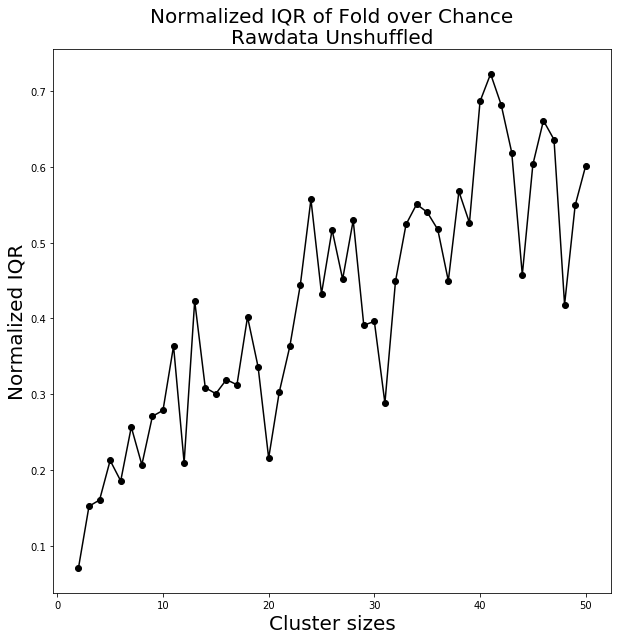

In [26]:
file = '/Users/ahyeon/Desktop/activ misc/rawdata_shuffled_manhattan_results.h5'
save = '/Users/ahyeon/Desktop/activ misc/rawdata_shuffled_manhattan_foc.pdf'
plot_clustering_results(file, save, plot_this='rel_iqr')